In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# 폰트 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

In [2]:
os.chdir("/Users/joekim/Downloads/data_038")

In [3]:
# 데이터 불러오기
data = pd.read_csv("data_038_1.csv")
explain = pd.read_excel("schema.xlsx")

# 전체 데이터 분야별 이용금액 합 그래프

In [4]:
# 각 분야별 전체 인원 구매금액 합 데이터 - all_sum
all_sum = data.sum()[7:-8]
xticks = all_sum.index
all_sum_data = pd.DataFrame({"index" : xticks, "value" : all_sum}).reset_index(drop=True)

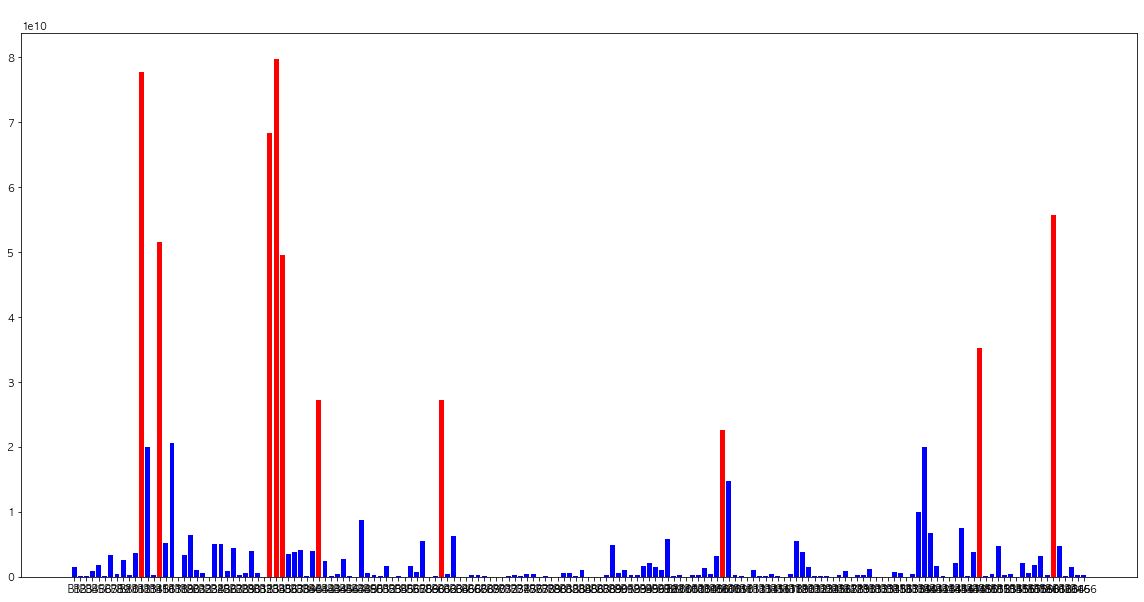

In [6]:
# 전체 데이터 분야별 이용금액 합 그래프
plt.figure(figsize=(20, 10))
plt.bar(list(all_sum_data['index']), list(all_sum_data['value']), color = list(all_sum_data['color']))
plt.title("사람들의 각 분야별 이용금액 합 그래프", color = "w",size=25)
plt.show()

# 전체 인원 분야별 사용분야 top10

In [5]:
# top10 뽑아내기 코드 - top10
top10 = list(all_sum_data.sort_values(by="value", ascending = False).iloc[:,0][0:10])
all_sum_data['color'] = "blue"
for i in top10:
    num = int(i.split("B")[1])
    if i in list(all_sum_data['index']):
        all_sum_data['color'][num-1] = "red"

<AxesSubplot:xlabel='index', ylabel='value'>

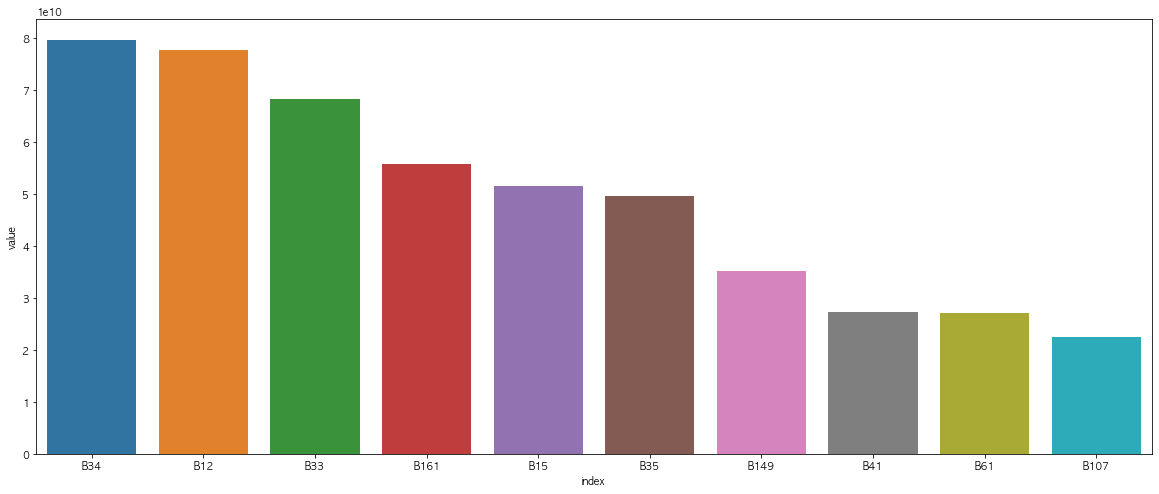

In [7]:
# 전체 각 분야별 금액합 top10 그래프
plt.figure(figsize = (20,8))
all_sum_data.index = all_sum_data['index']
top10data = all_sum_data.loc[top10,:]
sns.barplot(data = top10data, x = "index", y="value")

# 연령별 각 분야별 사용 금액합 그래프

In [22]:
# 연령별 이용금액합 데이터
data2 = data.iloc[:,1:-8]

age201 = data2[data2["P2"] == "20대_초"]
age202 = data2[data2['P2'] == "20대_후"]
age301 = data2[data2["P2"] == "30대_초"]
age302 = data2[data2['P2'] == "30대_후"]
age401 = data2[data2["P2"] == "40대_초"]
age402 = data2[data2['P2'] == "40대_후"]
age501 = data2[data2["P2"] == "50대_초"]
age502 = data2[data2['P2'] == "50대_후"]
age601 = data2[data2["P2"] == "60대_초"]
age602 = data2[data2['P2'] == "60대_후"]

age20 = pd.concat([age201,age202])
age3040 = pd.concat([age301,age302,age401,age402])
age5060 = pd.concat([age501,age502,age601,age602])

age20_sum = age20.sum()[6:]
age3040_sum = age3040.sum()[6:]
age5060_sum = age5060.sum()[6:]

sum20_data = pd.DataFrame({"index" : xticks, "value" : age20_sum}).reset_index(drop=True)
sum3040_data = pd.DataFrame({"index" : xticks, "value" : age3040_sum}).reset_index(drop=True)
sum5060_data = pd.DataFrame({"index" : xticks, "value" : age5060_sum}).reset_index(drop=True)

In [23]:
# 20대 top10 뽑아내기 코드 - top20
top20 = list(sum20_data.sort_values(by="value", ascending = False).iloc[:,0][0:10])
sum20_data['color'] = "blue"
for i in top20:
    num = int(i.split("B")[1])
    if i in list(sum20_data['index']):
        sum20_data['color'][num-1] = "red"
        
# 30,40대 top10 뽑아내기 코드 - top3040
top3040 = list(sum3040_data.sort_values(by="value", ascending = False).iloc[:,0][0:10])
sum3040_data['color'] = "blue"
for i in top3040:
    num = int(i.split("B")[1])
    if i in list(sum3040_data['index']):
        sum3040_data['color'][num-1] = "red"
        
# 50,60대 top10 뽑아내기 코드 - top5060
top5060 = list(sum5060_data.sort_values(by="value", ascending = False).iloc[:,0][0:10])
sum5060_data['color'] = "blue"
for i in top5060:
    num = int(i.split("B")[1])
    if i in list(sum5060_data['index']):
        sum5060_data['color'][num-1] = "red"

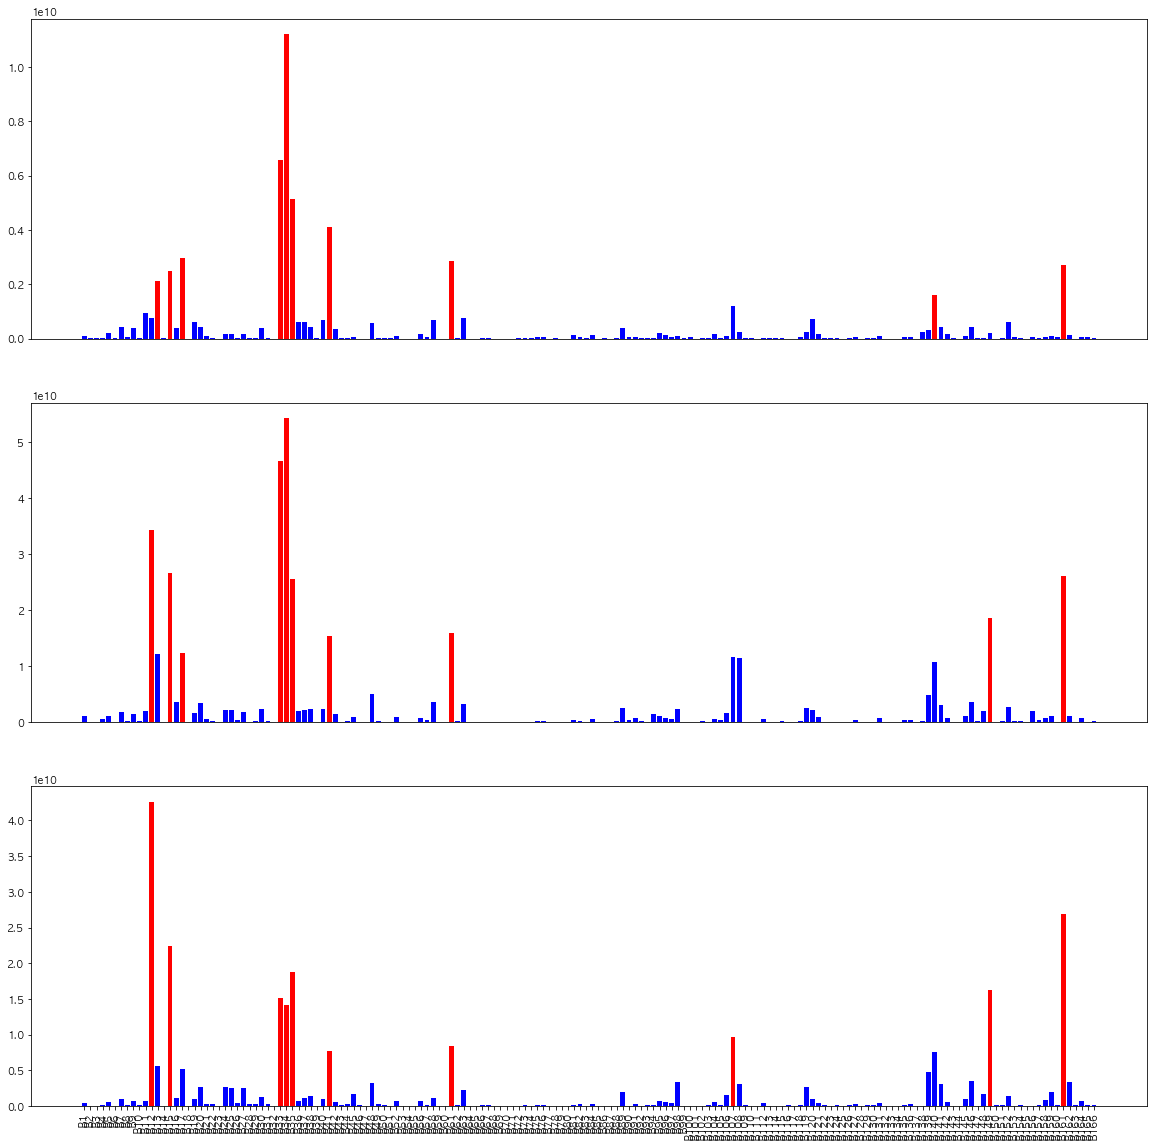

In [24]:
# 연령별 분야별 이용금액 합 그래프
plt.figure(figsize=(20,20))
plt.title("money sum graph by age")

plt.subplot(3,1,1)
plt.bar(list(sum20_data['index']), list(sum20_data['value']), color = list(sum20_data['color']))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.subplot(3,1,2)
plt.bar(list(sum3040_data['index']), list(sum3040_data['value']), color = list(sum3040_data['color']))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.subplot(3,1,3)
plt.bar(list(sum5060_data['index']), list(sum5060_data['value']), color = list(sum5060_data['color']))
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='index', ylabel='value'>

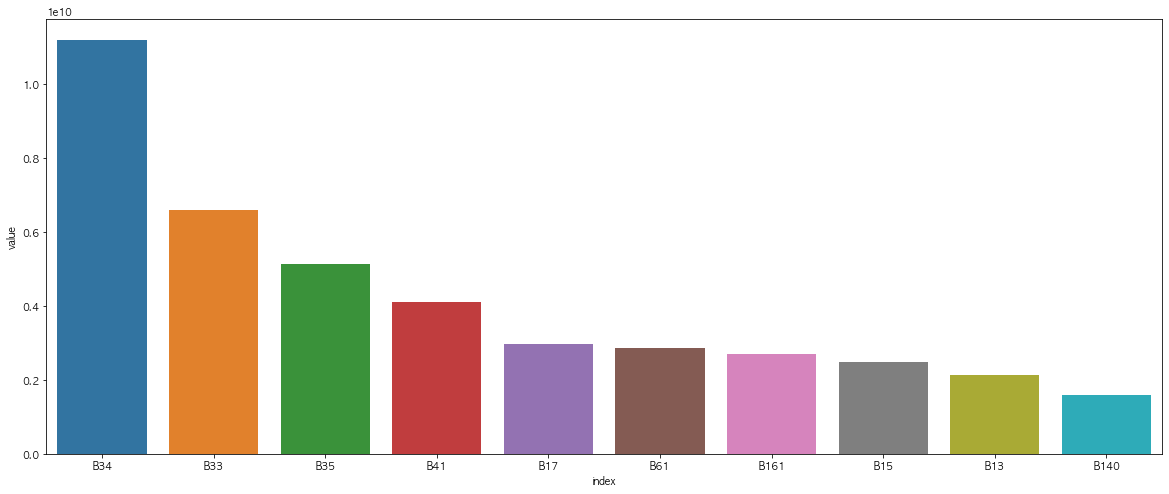

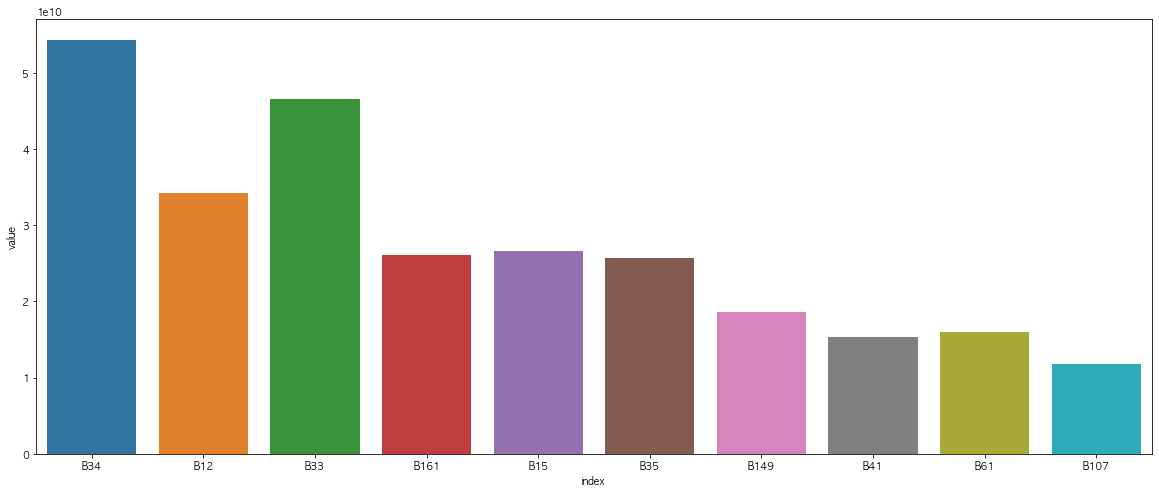

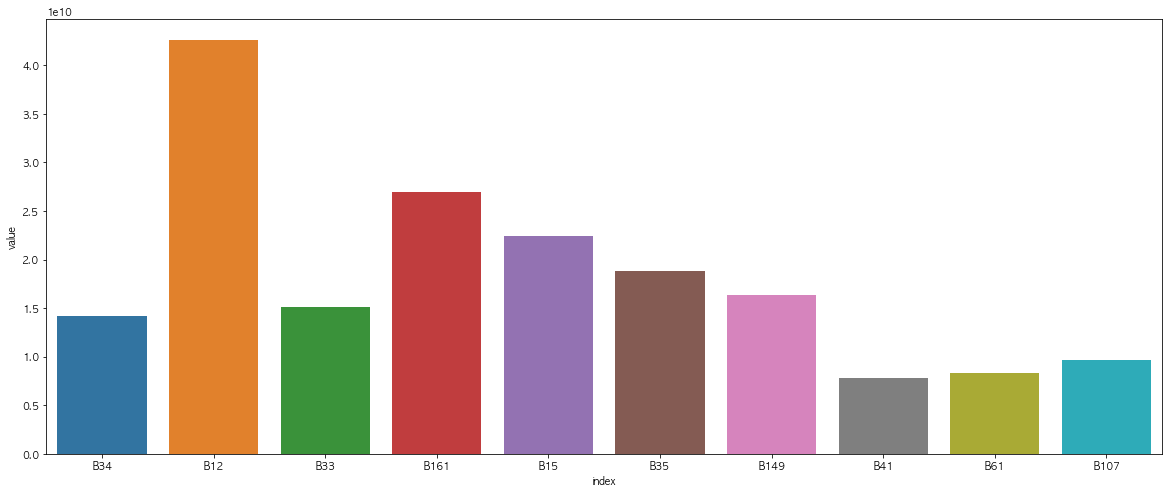

In [25]:
# 20대 각 분야별 금액합 top10 그래프
plt.figure(figsize = (20,8))
sum20_data.index = sum20_data['index']
top20data = sum20_data.loc[top20,:]
sns.barplot(data = top20data, x = "index", y="value")

# 30,40대 각 분야별 금액합 top10 그래프
plt.figure(figsize = (20,8))
sum3040_data.index = sum3040_data['index']
top3040data = sum3040_data.loc[top10,:]
sns.barplot(data = top3040data, x = "index", y="value")

# 50,60대 각 분야별 금액합 top10 그래프
plt.figure(figsize = (20,8))
sum5060_data.index = sum5060_data['index']
top5060data = sum5060_data.loc[top10,:]
sns.barplot(data = top5060data, x = "index", y="value")

# 데이터 분야별 그룹화하여 데이터시각화하기

In [27]:
temp_dat = data.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['농업']=0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['전자기기'] = 0
temp_dat['장비 및 화물운송'] = 0
temp_dat['생활서비스'] = 0
temp_dat['전문서비스'] = 0
temp_dat['제조업']=0
temp_dat['교통수단_관리'] = 0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif(i == 28):
        temp_dat['농업'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif(i == 33):
        temp_dat['전자기기'] += temp_dat[f"B{i}"]
    elif(i >= 124 and i <= 126):
        temp_dat['장비 및 화물운송'] += temp_dat[f"B{i}"]
    elif((i >= 127 and i <= 128) or (i == 133) or (i >= 135 and i <= 136)):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif(i >= 128 and i <= 132):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif(i >= 150 and i <= 151):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i == 119) or (i >= 158 and i <= 159) or (i >= 165 and i <= 166)):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

In [28]:
temp_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,교육,기타,쇼핑몰기타,사치품,전자기기,장비 및 화물운송,생활서비스,전문서비스,제조업,교통수단_관리
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,60000,102000,0,135000,0,0,0,0,0
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,0,0,146000,0,0,1000,0,0
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,523000,0,0,0,0,0,9000,0,0,0
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,0,0,314000,0,0,0,0,0
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,117000,48000,0,0,0,0,0,0,0
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,6000,0,1000,0,139000,0,0,1000,0,0
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,36000,0,484000,0,0,0,0,0


In [52]:
# 각 연령별 데이터 필터링
condition20 = (temp_dat.P2 == '20대_후') | (temp_dat.P2 =="20대_초") # 조건식 작성
condition3040 = (temp_dat.P2 == '30대_후') | (temp_dat.P2 =="30대_초") | (temp_dat.P2 == '40대_후') | (temp_dat.P2 =="40대_초")
condition5060 = (temp_dat.P2 == '50대_후') | (temp_dat.P2 =="50대_초") | (temp_dat.P2 == '60대_후') | (temp_dat.P2 =="60대_초")

dat20 = temp_dat[condition20].iloc[:,-20:]     # 20대 고객 데이터
dat3040 = temp_dat[condition3040].iloc[:,-20:] # 30,40대 고객 데이터
dat5060 = temp_dat[condition5060].iloc[:,-20:] # 50,60대 고객 데이터

column_index = dat20.columns

In [57]:
len(dat20)

48400

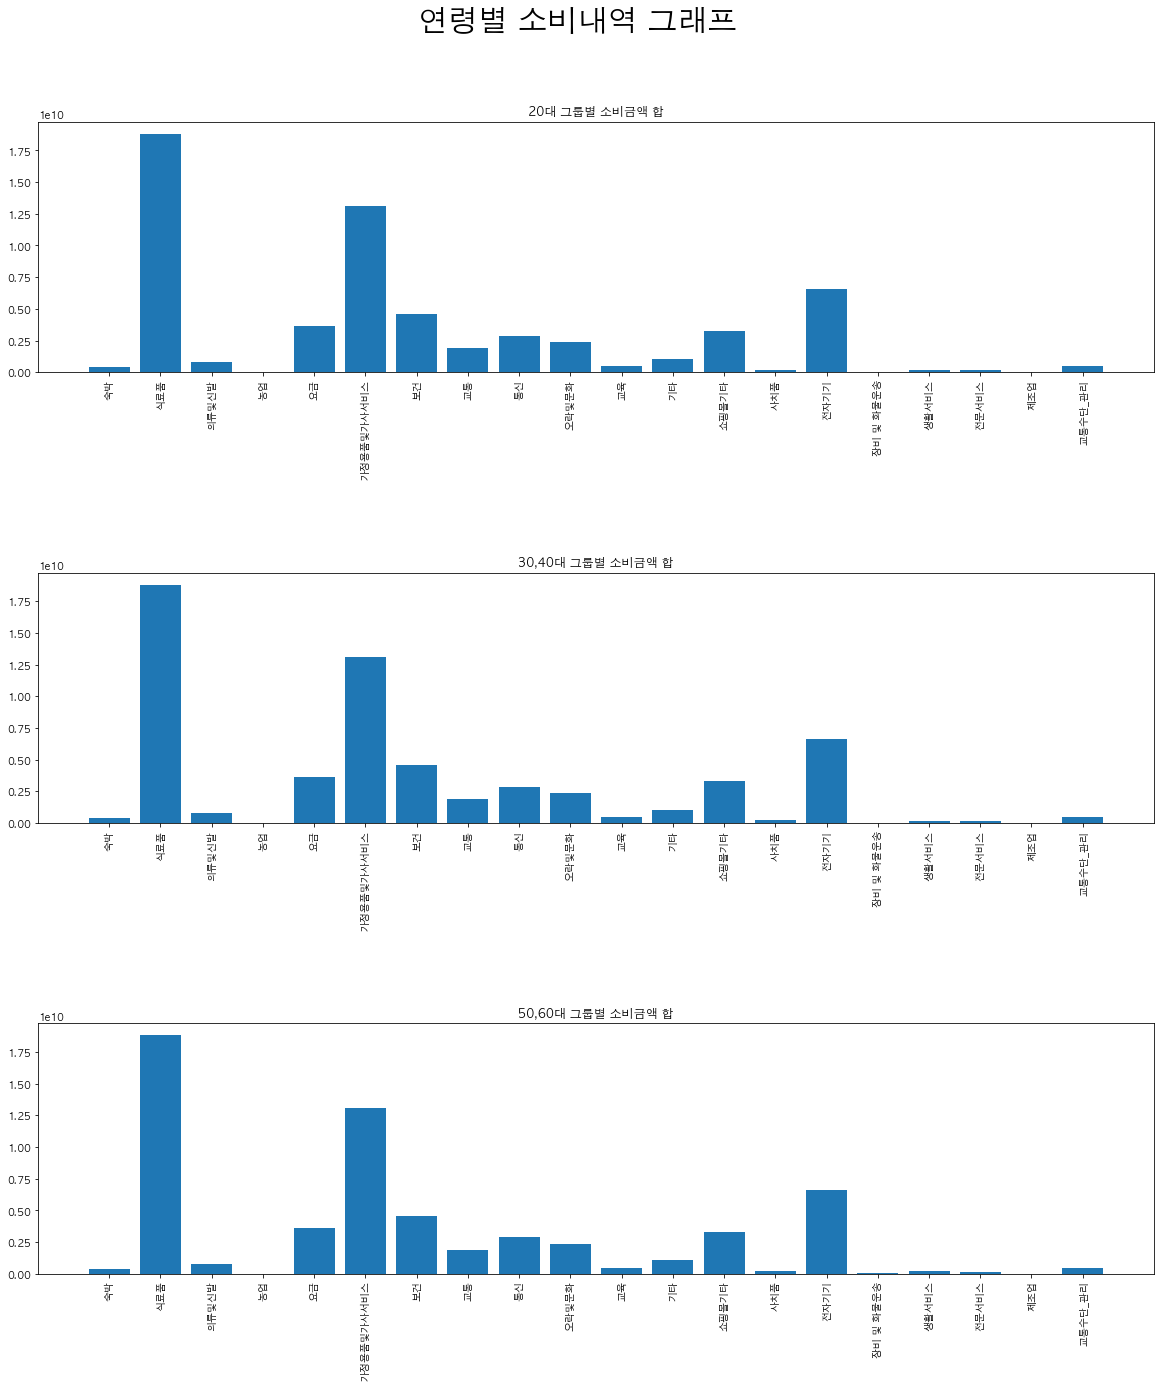

In [58]:
plt.figure(figsize=(20,20))


plt.subplot(3,1,1)
plt.title("20대 그룹별 소비금액 합")
plt.bar(x = column_index, height = list(dat20.sum()))
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
plt.title("30,40대 그룹별 소비금액 합")
plt.bar(x = column_index, height = list(dat20.sum()))
plt.xticks(rotation = 90)

plt.subplot(3,1,3)
plt.title("50,60대 그룹별 소비금액 합")
plt.bar(x = column_index, height = list(dat20.sum()))
plt.xticks(rotation = 90)

plt.suptitle("연령별 소비내역 그래프", fontsize = 30)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.80)
plt.show()